In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
xtrain = train.drop('label',axis=1)
ytrain = train['label']

In [5]:
xtest = test.drop('label',axis=1)
ytest = test['label']

In [6]:
#noramalising the pixel data

xtrain = xtrain/255.0
xtest = xtest/255.0

In [7]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(xtest.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000, 784)


In [8]:
print(xtrain.head())

   pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3     0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

   pixel9  pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   
1     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   
2     0.0      0.0  ...  0.000000       0.0       0.0  0.117647  0.168627   
3     0.0      0.0  ...  0.011765       0.0       0.0  0.000000  0.000000   
4     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0  0.000000       0.0       0.0 

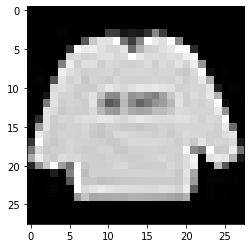

In [9]:
plt.imshow(np.array(xtrain.loc[0]).reshape(28,28),cmap='gray')

In [10]:
label_dic = {0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',
            5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle Boot'}

In [11]:
x= np.array(xtrain)

In [15]:
import tensorflow as ts

In [16]:
#from keras import utils

y = ts.keras.utils.to_categorical(np.array(ytrain),10)

In [17]:
pd.DataFrame(y).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### MLP Architecture

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [19]:
model =Sequential()

In [20]:
model.add(Dense(units= 24,input_dim= 784))
model.add(Activation('sigmoid'))
model.add(Dense(units= 10))
model.add(Activation('softmax'))

In [21]:
model.compile(loss ='categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [22]:
history = model.fit(x,y,epochs=10, batch_size= 1000,
                   validation_split=0.20)

Epoch 1/10
48/48 [==============================] - 1s 8ms/step - loss: 2.3362 - accuracy: 0.1007 - val_loss: 2.2517 - val_accuracy: 0.0996
Epoch 2/10
48/48 [==============================] - 0s 6ms/step - loss: 2.2076 - accuracy: 0.1519 - val_loss: 2.1690 - val_accuracy: 0.2333
Epoch 3/10
48/48 [==============================] - 0s 6ms/step - loss: 2.1385 - accuracy: 0.3066 - val_loss: 2.1067 - val_accuracy: 0.3752
Epoch 4/10
48/48 [==============================] - 0s 5ms/step - loss: 2.0796 - accuracy: 0.4232 - val_loss: 2.0496 - val_accuracy: 0.4590
Epoch 5/10
48/48 [==============================] - 0s 6ms/step - loss: 2.0241 - accuracy: 0.4776 - val_loss: 1.9952 - val_accuracy: 0.4897
Epoch 6/10
48/48 [==============================] - 0s 6ms/step - loss: 1.9707 - accuracy: 0.5012 - val_loss: 1.9428 - val_accuracy: 0.5128
Epoch 7/10
48/48 [==============================] - 0s 6ms/step - loss: 1.9193 - accuracy: 0.5217 - val_loss: 1.8924 - val_accuracy: 0.5333
Epoch 8/10
48/48 [==